In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols, rlm

from patsy import dmatrices
from sklearn_pandas import DataFrameMapper, cross_val_score
import sklearn.preprocessing, sklearn.decomposition, sklearn.linear_model, sklearn.pipeline, sklearn.metrics

In [223]:
data = pd.read_csv(
    "directed_unlimited/unmodified_symbol_and_name_in_subject_with_[ANN]_first_thread_post_introducers_metrics.csv", 
    index_col='coin').join(pd.read_csv(
        'types.csv',index_col='coin')).join(pd.read_csv(
        'coinmarketanalisis.csv',index_col='coin',skipinitialspace=True))
data['user1_years_since_first_post'] = data.user1_days_since_first_post/365.
data['log_severity']=np.log(data['severity_to_average_after_max_volume_weighted'])
data['log_volume']=np.log(data['total_volume'])

#subselect the variables we will be using inthe analysis    
tight_dataset = data[['user1_num_posts',
                      'user1_years_since_first_post',
                      'user1_clustering_coefficient',
                      'user1_closeness_centrality_unweighted',
                      'user1_satoshi_pagerank_weighted',
                      'type',
                      'log_volume',
                      'log_severity']]
independent_vars = " user1_num_posts + user1_years_since_first_post + user1_clustering_coefficient + user1_closeness_centrality_unweighted + user1_satoshi_pagerank_weighted + type"

In [224]:
print ols(formula="np.log(total_volume) ~ " + independent_vars ,data=data).fit(cov_type='HC3').summary() 

                             OLS Regression Results                             
Dep. Variable:     np.log(total_volume)   R-squared:                       0.124
Model:                              OLS   Adj. R-squared:                  0.105
Method:                   Least Squares   F-statistic:                     3.907
Date:                  Wed, 14 Oct 2015   Prob (F-statistic):           0.000922
Time:                          02:15:39   Log-Likelihood:                -637.45
No. Observations:                   279   AIC:                             1289.
Df Residuals:                       272   BIC:                             1314.
Df Model:                             6                                         
Covariance Type:                    HC3                                         
                                            coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------

In [77]:
print ols(formula="np.log(total_volume) ~ user1_num_posts:type + user1_years_since_first_post:type + type + user1_closeness_centrality_unweighted:type ",data=data).fit(cov_type='HC3').summary() 

                             OLS Regression Results                             
Dep. Variable:     np.log(total_volume)   R-squared:                       0.126
Model:                              OLS   Adj. R-squared:                  0.103
Method:                   Least Squares   F-statistic:                     3.789
Date:                  Wed, 14 Oct 2015   Prob (F-statistic):           0.000610
Time:                          00:00:28   Log-Likelihood:                -637.19
No. Observations:                   279   AIC:                             1290.
Df Residuals:                       271   BIC:                             1319.
Df Model:                             7                                         
Covariance Type:                    HC3                                         
                                                     coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------

In [225]:
print ols(formula="np.log(severity_to_average_after_max_volume_weighted) ~ user1_num_posts + user1_years_since_first_post + type + user1_closeness_centrality_unweighted:type ",data=data).fit(cov="H0").summary() 

                                              OLS Regression Results                                             
Dep. Variable:     np.log(severity_to_average_after_max_volume_weighted)   R-squared:                       0.097
Model:                                                               OLS   Adj. R-squared:                  0.081
Method:                                                    Least Squares   F-statistic:                     5.893
Date:                                                   Wed, 14 Oct 2015   Prob (F-statistic):           3.43e-05
Time:                                                           02:17:01   Log-Likelihood:                -248.56
No. Observations:                                                    279   AIC:                             509.1
Df Residuals:                                                        273   BIC:                             530.9
Df Model:                                                              5                

In [226]:
print ols(formula="np.log(severity_to_average_after_max_volume_weighted) ~ " + independent_vars,data=data).fit(cov="H0").summary() 

                                              OLS Regression Results                                             
Dep. Variable:     np.log(severity_to_average_after_max_volume_weighted)   R-squared:                       0.104
Model:                                                               OLS   Adj. R-squared:                  0.084
Method:                                                    Least Squares   F-statistic:                     5.268
Date:                                                   Wed, 14 Oct 2015   Prob (F-statistic):           3.73e-05
Time:                                                           02:18:10   Log-Likelihood:                -247.52
No. Observations:                                                    279   AIC:                             509.0
Df Residuals:                                                        272   BIC:                             534.5
Df Model:                                                              6                

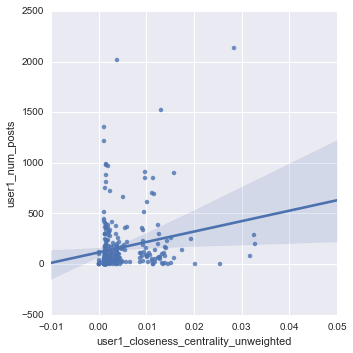

In [190]:
sns.lmplot('user1_closeness_centrality_unweighted','user1_num_posts',data)

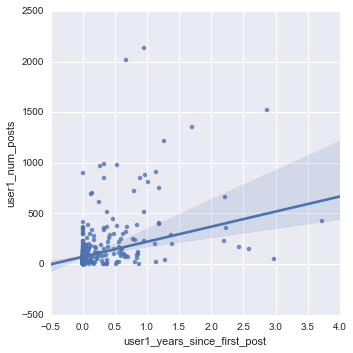

In [192]:
sns.lmplot('user1_years_since_first_post','user1_num_posts',data,robust=True)

In [220]:
data.columns

Index([u'earliest_trade_date', u'network_date', u'user1',
       u'user1_num_mentions', u'user1_num_posts', u'user1_num_subjects',
       u'user1_days_since_first_post', u'user1_degree_total',
       u'user1_degree_incoming', u'user1_degree_outgoing',
       u'user1_clustering_coefficient',
       u'user1_closeness_centrality_unweighted',
       u'user1_closeness_centrality_weighted',
       u'user1_closeness_centrality_incoming_unweighted',
       u'user1_closeness_centrality_outgoing_unweighted',
       u'user1_closeness_centrality_incoming_weighted',
       u'user1_closeness_centrality_outgoing_weighted',
       u'user1_betweenness_centrality_weighted', u'user1_satoshi_distance',
       u'user1_satoshi_pagerank_weighted', u'user1_pagerank_weighted', u'name',
       u'type', u'subcategory', u'max_price', u'min_price',
       u'severity_to_min_price', u'severity_to_min_price_after_max',
       u'severity_to_last', u'severity_to_average',
       u'severity_to_average_after_max',
      

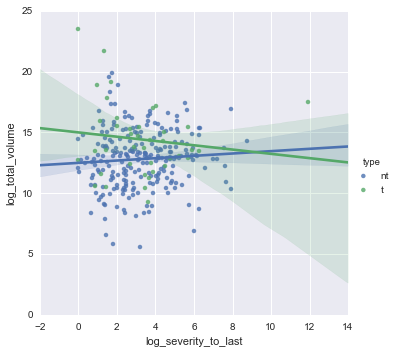

In [117]:
sns.lmplot("log_severity", "log_volume",data,hue='type')

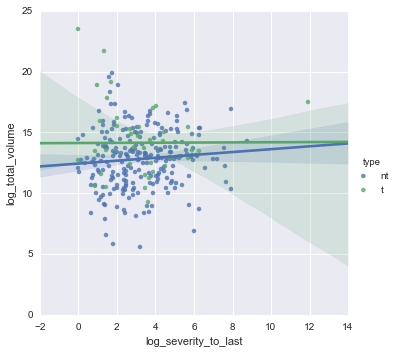

In [131]:
sns.lmplot("log_severity_to_last", "log_total_volume",data,hue='type', robust=True)

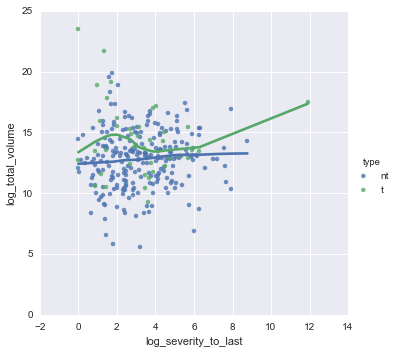

In [132]:
sns.lmplot("log_severity_to_last", "log_total_volume",data,hue='type', lowess=True)

' user1_num_posts + user1_years_since_first_post + user1_clustering_coefficient + user1_closeness_centrality_unweighted + user1_satoshi_pagerank_weighted + type'

In [185]:

y,X = dmatrices("np.log(total_volume) ~ 0+  " + independent_vars ,data,return_type='dataframe' )
X = sklearn.preprocessing.scale(X)
y = sklearn.preprocessing.scale(y['np.log(total_volume)'])
#model_aic = LassoLarsIC(criterion='aic')
#model_aic.fit(np.array(X), np.array(y))
print sm.OLS(y,X).fit(cov_type='HC3').summary() 

reg_para = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]

from sklearn.linear_model import Lasso, LassoCV
lasso_model = LassoCV(cv=10, alphas=reg_para)
lasso_fit = lasso_model.fit(X,y)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                 4.381e+15
Date:                Wed, 14 Oct 2015   Prob (F-statistic):               0.00
Time:                        01:51:57   Log-Likelihood:                -377.36
No. Observations:                 279   AIC:                             766.7
Df Residuals:                     273   BIC:                             788.5
Df Model:                           6                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1            -0.1064      0.033     -3.191      0.0

In [186]:
y,X = dmatrices("np.log(total_volume) ~ 0+  " + independent_vars ,data,return_type='dataframe' )
X = sklearn.preprocessing.scale(X)
y = sklearn.preprocessing.scale(y['np.log(total_volume)'])

from sklearn import cross_validation, linear_model

lasso = linear_model.Lasso()
alphas = np.logspace(-4, -.5, 30)

scores = list()
scores_std = list()

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_validation.cross_val_score(lasso, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

plt.figure(figsize=(4, 3))
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')


lasso_cv = linear_model.LassoCV(alphas=alphas)
k_fold = cross_validation.KFold(len(X), 5)
scores=[]
for k, (train, test) in enumerate(k_fold):
    lasso_cv.fit(X[train], y[train])
    s=lasso_cv.score(X[test], y[test])
    scores.append(s)
print "Average out of sample score on cross validation %f"% np.average(scores)


1

Average out of sample score on cross validation 0.058798


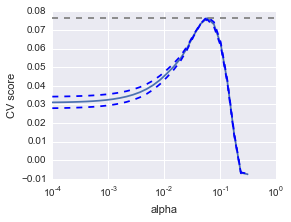

In [219]:
import matplotlib.pyplot as plt
y,X = dmatrices("np.log(total_volume) ~ 0+  " + independent_vars ,data,return_type='dataframe' )
X = sklearn.preprocessing.scale(X)
y = sklearn.preprocessing.scale(y['np.log(total_volume)'])

from sklearn import cross_validation, linear_model

lasso = linear_model.Lasso()
alphas = np.logspace(-4, -.5, 30)

scores = list()
scores_std = list()

for alpha in alphas:
    lasso.alpha = alpha
    this_scores = cross_validation.cross_val_score(lasso, X, y, n_jobs=1)
    scores.append(np.mean(this_scores))
    scores_std.append(np.std(this_scores))

plt.figure(figsize=(4, 3))
plt.semilogx(alphas, scores)
# plot error lines showing +/- std. errors of the scores
plt.semilogx(alphas, np.array(scores) + np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.semilogx(alphas, np.array(scores) - np.array(scores_std) / np.sqrt(len(X)),
             'b--')
plt.ylabel('CV score')
plt.xlabel('alpha')
plt.axhline(np.max(scores), linestyle='--', color='.5')


lasso_cv = linear_model.LassoCV(alphas=alphas)
k_fold = cross_validation.KFold(len(X), 5)
scores=[]
for k, (train, test) in enumerate(k_fold):
    lasso_cv.fit(X[train], y[train])
    s=lasso_cv.score(X[test], y[test])
    scores.append(s)
print "Average out of sample score on cross validation %f"% np.average(scores)


In [ ]:
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier



In [70]:
?dmatrix

Object `dmatrix` not found.


In [29]:
data.columns

Index([u'earliest_trade_date', u'network_date', u'user1',
       u'user1_num_mentions', u'user1_num_posts', u'user1_num_subjects',
       u'user1_days_since_first_post', u'user1_degree_total',
       u'user1_degree_incoming', u'user1_degree_outgoing',
       u'user1_clustering_coefficient',
       u'user1_closeness_centrality_unweighted',
       u'user1_closeness_centrality_weighted',
       u'user1_closeness_centrality_incoming_unweighted',
       u'user1_closeness_centrality_outgoing_unweighted',
       u'user1_closeness_centrality_incoming_weighted',
       u'user1_closeness_centrality_outgoing_weighted',
       u'user1_betweenness_centrality_weighted', u'user1_satoshi_distance',
       u'user1_satoshi_pagerank_weighted', u'user1_pagerank_weighted', u'name',
       u'type', u'subcategory', u'max_price', u'min_price',
       u'severity_to_min_price', u'severity_to_min_price_after_max',
       u'severity_to_last', u'severity_to_average',
       u'severity_to_average_after_max',
      

In [43]:
"np.log(total_volume) " + independent_vars

'np.log(total_volume)  ~ user1_num_posts + user1_years_since_first_post + user1_clustering_coefficient + user1_closeness_centrality_unweighted + user1_satoshi_pagerank_weighted + type'

In [99]:
data.values

array([['2014-08-27', '2014-08-15', 'Project Axron', ..., False,
        0.0027397260273972603, 2.4932736279398613],
       ['2014-02-09', '2013-12-22', 'myhoho', ..., False,
        2.4356164383561643, 4.264240618973683],
       ['2013-05-22', '2013-05-15', 'WorldCoin', ..., False,
        0.0027397260273972603, 3.6982008854492725],
       ..., 
       ['2014-07-10', '2014-06-22', 'mitchellmint', ..., True,
        0.3232876712328767, 1.5841451197717964],
       ['2014-05-26', '2013-05-16', 'Supercoin', ..., False,
        0.0027397260273972603, 4.54434111357337],
       ['2014-02-10', '2014-01-23', 'SCryptoMiners', ..., True,
        0.00821917808219178, 2.4707768956905363]], dtype=object)

In [151]:
data['user1_num_mentions'].describe()

count    315
mean       1
std        0
min        1
25%        1
50%        1
75%        1
max        1
Name: user1_num_mentions, dtype: float64

In [160]:
?scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x15fefcfd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x1a351a650>]], dtype=object)

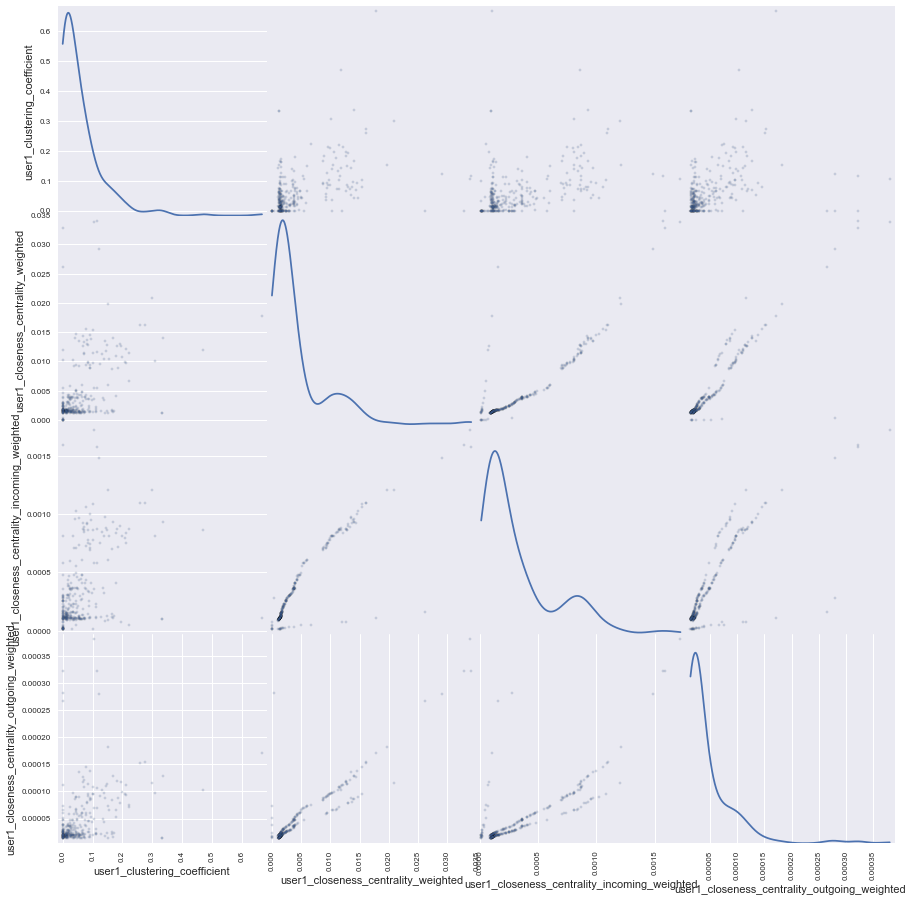

In [221]:
from pandas.tools.plotting import scatter_matrix

scatter_matrix(data[[
       u'user1_clustering_coefficient',
       u'user1_closeness_centrality_weighted',
       u'user1_closeness_centrality_incoming_weighted',
       u'user1_closeness_centrality_outgoing_weighted']], alpha=0.2, figsize=(15, 15), diagonal='kde')

